## Exploratory Data Analysis on the Laptop Prices Dataset

### 1.0 Importando as libs

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.0 Carregar o dataset

In [5]:
prices_df = pd.read_csv("../data/processed/clean_prices.csv", sep=',', encoding='latin1')
print(prices_df.head())

   laptop_ID  Inches  Ram  Weight  Price_euros  ScreenWidth  ScreenHeight   
0          1    13.3    8    1.37      1339.69         2560          1600  \
1          2    13.3    8    1.34       898.94         1440           900   
2          3    15.6    8    1.86       575.00         1920          1080   
3          4    15.4   16    1.83      2537.45         2880          1800   
4          5    13.3    8    1.37      1803.60         2560          1600   

   CPU_FREQUENCY  Memory_Size  company_Acer  ...  OpSys_Mac OS X  OpSys_No OS   
0            2.3        128.0             0  ...               0            0  \
1            1.8        128.0             0  ...               0            0   
2            2.5        256.0             0  ...               0            1   
3            2.7        512.0             0  ...               0            0   
4            3.1        256.0             0  ...               0            0   

   OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Win

### 3.0 Analisando as correlações lineares
Vamos manter apenas o top 20 variáveis mais correlacionadas

In [6]:
corr_df = prices_df.corr()

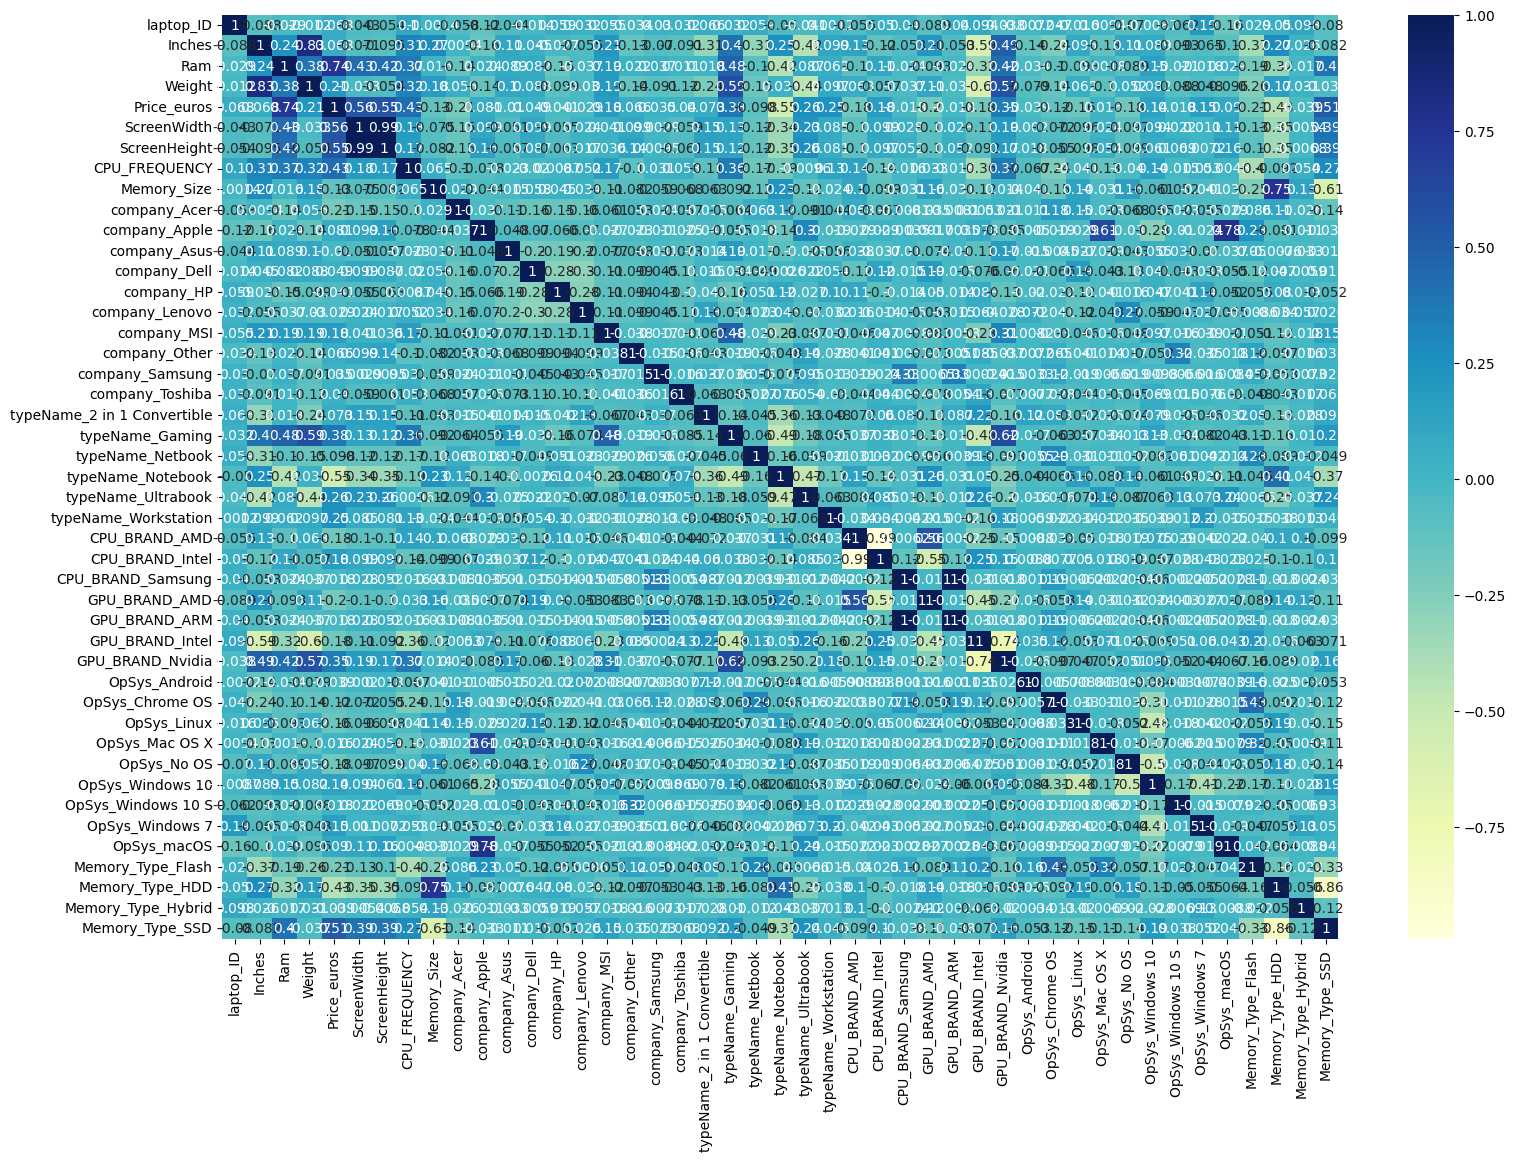

In [14]:
fig, axis = plt.subplots(figsize=(18, 12))
sns.heatmap(
    corr_df,
    annot=True,
    cmap="YlGnBu"
)
plt.show()

#### 3.1 Definindo um limite mínimo

In [15]:
# Pegando apenas a correlação com o target
target_correlations_df = corr_df["Price_euros"].apply(abs).sort_values()

In [16]:
target_correlations_df

company_Asus                   0.010376
OpSys_Mac OS X                 0.015656
OpSys_Windows 10 S             0.018312
GPU_BRAND_ARM                  0.018431
CPU_BRAND_Samsung              0.018431
company_Lenovo                 0.029007
company_Samsung                0.034584
OpSys_Android                  0.038700
Memory_Type_Hybrid             0.039386
company_Toshiba                0.040339
company_HP                     0.041291
company_Dell                   0.048509
company_Other                  0.066406
laptop_ID                      0.067830
Inches                         0.068197
typeName_2 in 1 Convertible    0.072675
company_Apple                  0.080688
OpSys_macOS                    0.089928
typeName_Netbook               0.097572
OpSys_Chrome OS                0.118684
Memory_Size                    0.125363
OpSys_Windows 10               0.137048
OpSys_Windows 7                0.152381
OpSys_Linux                    0.162060
OpSys_No OS                    0.177094


In [25]:
top_features = list(target_correlations_df[-21:].index)

In [26]:
top_features

['OpSys_No OS',
 'company_MSI',
 'CPU_BRAND_AMD',
 'CPU_BRAND_Intel',
 'GPU_BRAND_Intel',
 'GPU_BRAND_AMD',
 'company_Acer',
 'Weight',
 'Memory_Type_Flash',
 'typeName_Workstation',
 'typeName_Ultrabook',
 'GPU_BRAND_Nvidia',
 'typeName_Gaming',
 'Memory_Type_HDD',
 'CPU_FREQUENCY',
 'Memory_Type_SSD',
 'typeName_Notebook',
 'ScreenHeight',
 'ScreenWidth',
 'Ram',
 'Price_euros']

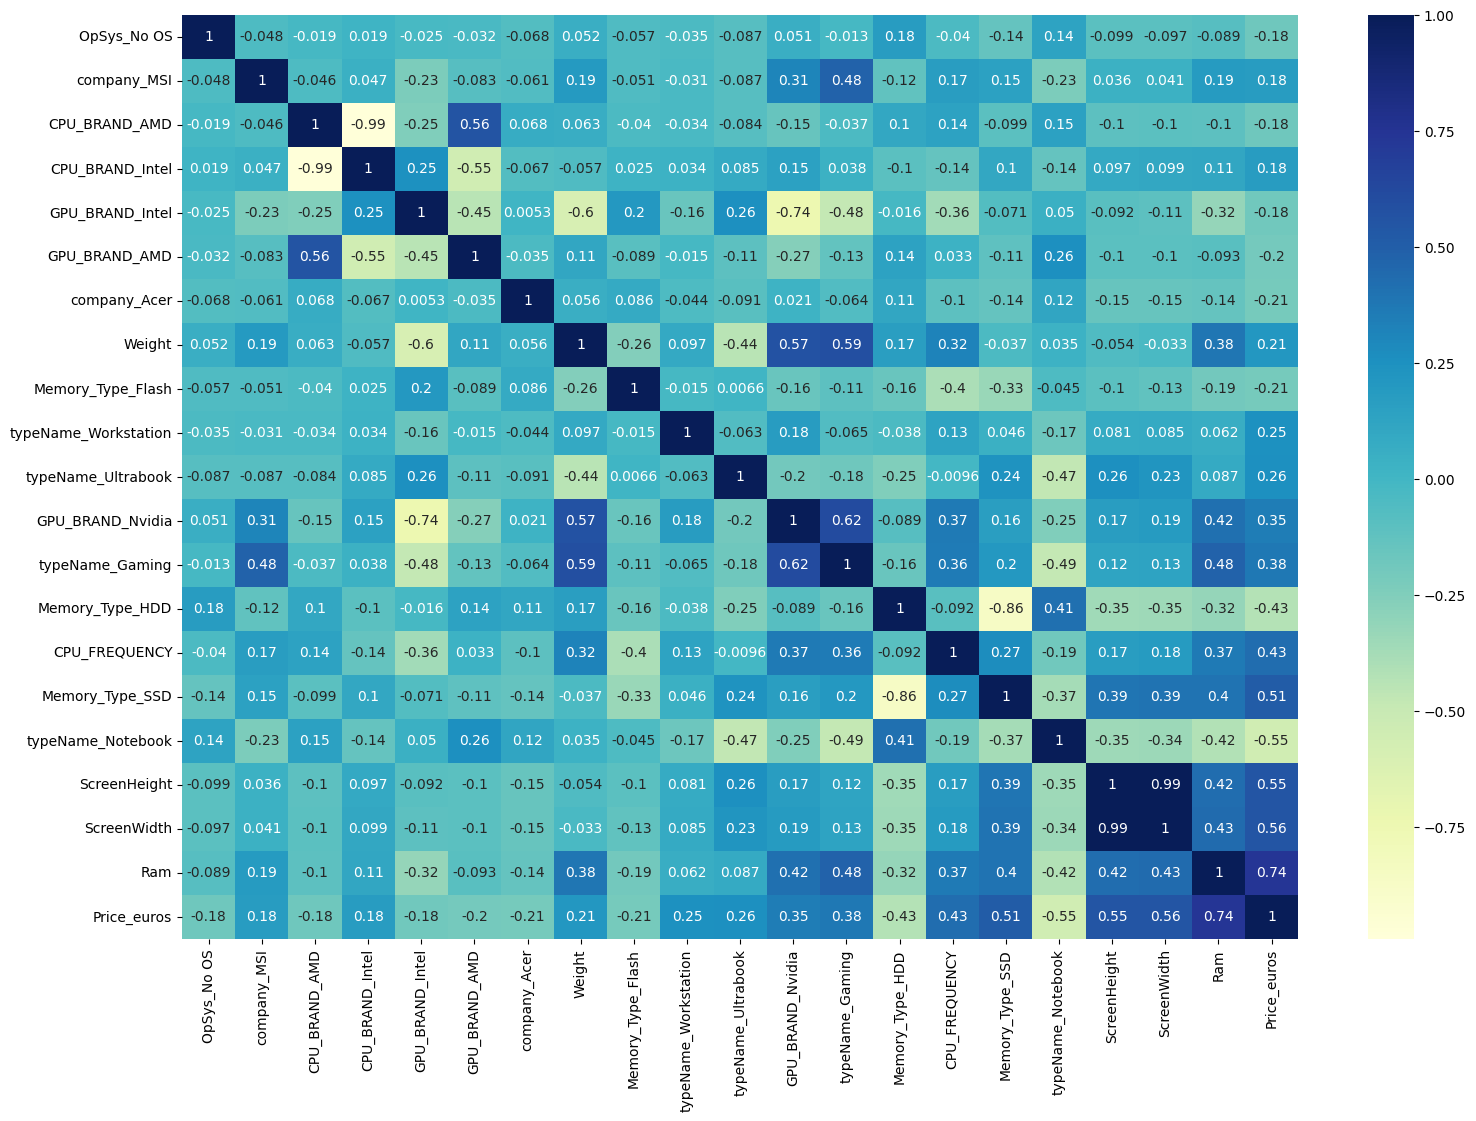

In [27]:
fig, axis = plt.subplots(figsize=(18, 12))
sns.heatmap(
    prices_df[top_features].corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()